In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle as pk
import json

In [17]:
path_git = 'c:/Git_Proyects/Tesis/Base_Twitter/'

nombre = 'kicillof'

kici_oct = pd.read_csv(path_git+'Tweets_'+nombre+'_oct.csv')
#clusters = pk.load(open(path_git+nombre+'_clusters_75_oct.pk', 'rb'))

#frases = list(kici_oct['Tweets_sin_url'])
#cluster_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
#kici_oct['cluster'] = kici_oct['Tweets_sin_url'].map(cluster_map)
kici_oct = pd.read_csv(path_git+'Tweets_kici_nuevo.csv')
kici_oct['RT'] = False

df_cluster = kici_oct[kici_oct['cluster'] == True]
df_cluster


,Unnamed: 0.1,Unnamed: 0,Tweets,Fecha,urls,urls_reales,medios,Tweets_sin_url,cluster,RT
5219,5219,5219,el pelotudo de kicillof diciendo que la gente ...,Mon Oct 07 01:53:27 +0000 2019,0,0,False,el pelotudo de kicillof diciendo que la gente ...,True,False
5390,5390,5390,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:33:55 +0000 2019,https://t.co/NVpIE0JZaj,https://www.clarin.com/politica/axel-kicillof-...,True,"Axel Kicillof: ""Ahora hay gente que se dedica ...",True,False
5401,5401,5401,No tiene vergüenza. Ojalá lo agarre la gente q...,Mon Oct 07 02:38:06 +0000 2019,https://t.co/B3g7UQgIiN,http://bit.ly/2IwieGC?fromRef=twitter,False,No tiene vergüenza. Ojalá lo agarre la gente q...,True,False
5434,5434,5434,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:48:17 +0000 2019,https://t.co/r3iSiR0uw0,https://www.clarin.com/politica/axel-kicillof-...,False,"Axel Kicillof: ""Ahora hay gente que se dedica ...",True,False
5440,5440,5440,La sinceridad de esta frase desnuda la complic...,Mon Oct 07 02:47:24 +0000 2019,https://t.co/aRe9GCku20,https://www.clarin.com/politica/axel-kicillof-...,False,La sinceridad de esta frase desnuda la complic...,True,False
...,...,...,...,...,...,...,...,...,...,...
35951,35951,35951,...O cómo estas:\n“Vamos a volver” (Cesar Mila...,Fri Oct 25 22:14:01 +0000 2019,0,0,False,...O cómo estas:\n“Vamos a volver” (Cesar Mila...,True,False
41788,41788,41788,Kicillof dijo qué hay gente que se dedica a ve...,Mon Oct 28 01:41:07 +0000 2019,0,0,False,Kicillof dijo qué hay gente que se dedica a ve...,True,False
48409,48409,48409,"Ganó el drogon de Kicillof, el mismo que decla...",Mon Oct 28 02:08:39 +0000 2019,0,0,False,"Ganó el drogon de Kicillof, el mismo que decla...",True,False
49775,49775,49775,Nunca se olviden a Kicillof diciendo que hay g...,Mon Oct 28 02:39:22 +0000 2019,0,0,False,Nunca se olviden a Kicillof diciendo que hay g...,True,False


In [18]:
df_cluster.drop(columns=['Unnamed: 0'], inplace=True)
df_cluster.drop(columns=['Unnamed: 0.1'], inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_15120\2882788579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.drop(columns=['Unnamed: 0'], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15120\2882788579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.drop(columns=['Unnamed: 0.1'], inplace=True)


In [19]:
import json

filename = 'c:/Facultad/Tesis/Twitter/201910-kicillof.txt'
tweets_cluster = set(list(df_cluster['Tweets']))

# Crea un diccionario para almacenar los tweets originales y sus retweets asociados
retweets_dict = {tweet: [] for tweet in tweets_cluster}

retweets_data = []
with open(filename, 'r', encoding='utf8') as fp:
    for i, line in enumerate(fp):
        json_data = json.loads(line)
        tweet = json_data['text']
        if tweet.startswith('RT'):
            try:
                original_tweet = json_data['retweeted_status']['full_text']
                if original_tweet in tweets_cluster:
                    retweets_dict[original_tweet].append(tweet)
                    filt = df_cluster['Tweets'] == original_tweet
                    medios = df_cluster[filt]['medios'].tolist()[0]
                    retweets_data.append({
                        "Tweets": original_tweet,
                        "Fecha": json_data['created_at'],
                        "urls": 0,
                        "urls_reales":0, 
                        "medios": medios,
                        "Tweets_sin_url": original_tweet,
                        "cluster": True,
                        "RT": True
                    })               
            except KeyError:
                pass
#df_cluster.drop(columns=['Unnamed: 0'], inplace=True)


In [20]:
df_RT = pd.DataFrame(retweets_data)
clus_3_completo = pd.concat([df_cluster, df_RT], ignore_index=True)
clus_3_completo 

,Tweets,Fecha,urls,urls_reales,medios,Tweets_sin_url,cluster,RT
0,el pelotudo de kicillof diciendo que la gente ...,Mon Oct 07 01:53:27 +0000 2019,0,0,False,el pelotudo de kicillof diciendo que la gente ...,True,False
1,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:33:55 +0000 2019,https://t.co/NVpIE0JZaj,https://www.clarin.com/politica/axel-kicillof-...,True,"Axel Kicillof: ""Ahora hay gente que se dedica ...",True,False
2,No tiene vergüenza. Ojalá lo agarre la gente q...,Mon Oct 07 02:38:06 +0000 2019,https://t.co/B3g7UQgIiN,http://bit.ly/2IwieGC?fromRef=twitter,False,No tiene vergüenza. Ojalá lo agarre la gente q...,True,False
3,"Axel Kicillof: ""Ahora hay gente que se dedica ...",Mon Oct 07 02:48:17 +0000 2019,https://t.co/r3iSiR0uw0,https://www.clarin.com/politica/axel-kicillof-...,False,"Axel Kicillof: ""Ahora hay gente que se dedica ...",True,False
4,La sinceridad de esta frase desnuda la complic...,Mon Oct 07 02:47:24 +0000 2019,https://t.co/aRe9GCku20,https://www.clarin.com/politica/axel-kicillof-...,False,La sinceridad de esta frase desnuda la complic...,True,False
...,...,...,...,...,...,...,...,...
27641,"""Si hubiera tenido que juntar cartones, hubier...",Mon Oct 28 02:42:40 +0000 2019,0,0,False,"""Si hubiera tenido que juntar cartones, hubier...",True,True
27642,Nunca se olviden a Kicillof diciendo que hay g...,Mon Oct 28 02:47:06 +0000 2019,0,0,False,Nunca se olviden a Kicillof diciendo que hay g...,True,True
27643,Nunca se olviden a Kicillof diciendo que hay g...,Mon Oct 28 02:49:23 +0000 2019,0,0,False,Nunca se olviden a Kicillof diciendo que hay g...,True,True
27644,Kicillof dijo qué hay gente que se dedica a ve...,Mon Oct 28 16:02:11 +0000 2019,0,0,False,Kicillof dijo qué hay gente que se dedica a ve...,True,True


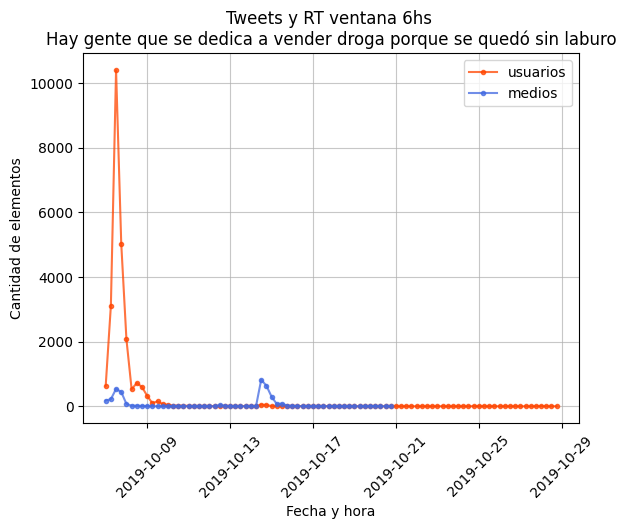

In [49]:
clus_3_completo['Fecha'] = pd.to_datetime(clus_3_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
horas = '6H'
#ventana_temporal = pd.offsets.Hour(horas)
clus_3_medios =  clus_3_completo[clus_3_completo['medios']== True]
clus_3_user =  clus_3_completo[clus_3_completo['medios']== False]
dos_tipos =[clus_3_user, clus_3_medios]
names = ['usuarios', 'medios']
colors = ['orangered', 'royalblue']
plt.figure()
maximo = []
for i, tipos in enumerate(dos_tipos):
    df_grouped = tipos.groupby(pd.Grouper(key='Fecha', freq=horas)).size().reset_index(name='count')
    maximo.append(max(df_grouped['count']))
    plt.plot(df_grouped['Fecha'], df_grouped['count'], marker='.', linestyle='-', label = names[i], alpha = 0.75, color = colors[i])

# df_grouped = clus_3_completo.groupby(pd.Grouper(key='Fecha', freq=horas)).size().reset_index(name='count')
# plt.plot(df_grouped['Fecha'], df_grouped['count'], marker='o', linestyle='-', label = 'completo')
frase_base = "Hay gente que se dedica a vender droga porque se quedó sin laburo"
plt.title("Tweets y RT ventana 6hs \n"+ frase_base)
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de elementos')
#plt.xlim([datetime(2019, 10, 26), datetime(2019, 10, 30)])
#plt.yscale('log')
plt.legend()
plt.grid(alpha = 0.7)
plt.xticks(rotation=45)
plt.show()

In [39]:
for i in range(0, 20):
    print(df_cluster['Tweets'][df_cluster.index[i]])

el pelotudo de kicillof diciendo que la gente vende droga porque no tiene laburo. Como carajo votaron eso teniendo a vidal al lado? Tanta agua de zanja y cagar en un balde les quemos las neuronas
Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" https://t.co/NVpIE0JZaj
No tiene vergüenza. Ojalá lo agarre la gente que se quedò sin laburo y lo cague bien a trompadas en el culo. Hipócrita. Esto votan el 27/10.  
Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" - https://t.co/B3g7UQgIiN
Axel Kicillof: "Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" https://t.co/r3iSiR0uw0
La sinceridad de esta frase desnuda la complicidad de Axel Kicillof con la droga “Ahora hay gente que se dedica a vender droga porque se quedó sin laburo" https://t.co/aRe9GCku20
Para Kicillof no hay que penalizar a los que venden droga
 “hay más gente que se dedica a vender droga porque se quedó sin laburo, expresó y 